In [28]:
ENV["LINES"] = 200
ENV["COLUMNS"] = 200
using Printf
using Distributions
using LaTeXStrings
using StatsPlots
default(fmt=:png)
using SymPy

In [44]:
rd(x) = round(x; sigdigits=2)
n, ps, ks = 20, 0:0.1:1, 0:n
mat_doubled_cdf = @. rd(2cdf(Binomial(n, ps'), ks))
Any[
    "k\\p" permutedims(["$p" for p in ps])
    ks mat_doubled_cdf
]

22×12 Matrix{Any}:
   "k\\p"   "0.0"   "0.1"   "0.2"   "0.3"   "0.4"   "0.5"   "0.6"    "0.7"    "0.8"    "0.9"    "1.0"
  0        2.0     0.24    0.023   0.0016  7.3e-5  1.9e-6  2.2e-8   7.0e-11  2.1e-14  2.0e-20  0.0
  1        2.0     0.78    0.14    0.015   0.001   4.0e-5  6.8e-7   3.3e-9   1.7e-12  3.6e-18  0.0
  2        2.0     1.4     0.41    0.071   0.0072  0.0004  1.0e-5   7.5e-8   6.5e-11  3.1e-16  0.0
  3        2.0     1.7     0.82    0.21    0.032   0.0026  9.5e-5   1.1e-6   1.6e-9   1.7e-14  0.0
  4        2.0     1.9     1.3     0.48    0.1     0.012   0.00063  1.1e-5   2.8e-8   6.5e-13  0.0
  5        2.0     2.0     1.6     0.83    0.25    0.041   0.0032   8.6e-5   3.6e-7   1.9e-11  0.0
  6        2.0     2.0     1.8     1.2     0.5     0.12    0.013    0.00052  3.7e-6   4.3e-10  0.0
  7        2.0     2.0     1.9     1.5     0.83    0.26    0.042    0.0026   3.0e-5   7.8e-9   0.0
  8        2.0     2.0     2.0     1.8     1.2     0.5     0.11     0.01     0.0002   1

In [46]:
rd(x) = round(x; sigdigits=4)
n, ps, ks = 20, 0:0.1:1, 0:n
mat_doubled_ccdf = @. rd(ccdf(Binomial(n, ps'), ks-1))
Any[
    "k\\p" permutedims(["$p" for p in ps])
    ks mat_doubled_ccdf
]

22×12 Matrix{Any}:
   "k\\p"   "0.0"   "0.1"      "0.2"      "0.3"      "0.4"     "0.5"      "0.6"     "0.7"      "0.8"    "0.9"   "1.0"
  0        1.0     1.0        1.0        1.0        1.0       1.0        1.0       1.0        1.0      1.0     1.0
  1        0.0     0.8784     0.9885     0.9992     1.0       1.0        1.0       1.0        1.0      1.0     1.0
  2        0.0     0.6083     0.9308     0.9924     0.9995    1.0        1.0       1.0        1.0      1.0     1.0
  3        0.0     0.3231     0.7939     0.9645     0.9964    0.9998     1.0       1.0        1.0      1.0     1.0
  4        0.0     0.133      0.5886     0.8929     0.984     0.9987     1.0       1.0        1.0      1.0     1.0
  5        0.0     0.04317    0.3704     0.7625     0.949     0.9941     0.9997    1.0        1.0      1.0     1.0
  6        0.0     0.01125    0.1958     0.5836     0.8744    0.9793     0.9984    1.0        1.0      1.0     1.0
  7        0.0     0.002386   0.08669    0.392      0.75  

In [47]:
x ⪅ y = x < y || x ≈ y
x ⪆ y = x > y || x ≈ y

"""
    central法による二項分布の両側P値
二項分布binにおける「k以下になる確率の2倍」と「k以上になる確率の2倍」と「1」の中での最小の値

このP値からClopper-Pearsonの信頼区間が得られる。
"""
pvalue_central(bin, k) = min(1, 2cdf(bin, k), 2ccdf(bin, k-1))

"""
    minimum likelihood法による二項分布の両側P値
このP値からSterneの信頼区間が得られる。
"""
pvalue_minlike(bin, k) = sum(pdf(bin, i) for i in 0:n if pdf(bin, i) ⪅ pdf(bin, k))

"""
    score法による二項分布の両側P値
このP値は二項分布の正規分布近似で定義された両側P値と同じ。
"""
function pvalue_score(bin, k)
    (; n, p) = bin
    phat = k/n
    se = std(bin)
    z = (phat - p) / se
    2ccdf(Normal(), abs(z))
end

pvalue_score

In [50]:
n, p, k = 20, 0.45, 14
pvalue_central(Binomial(n, p), k)

0.04282871128604189

In [16]:
(; n, p) = bin
n, p

(20, 0.6)

In [14]:
?pvalue_binomial_central

search: pvalue_binomial_central



```julia
central法による二項分布の両側P値
```

二項分布binにおける「k以下になる確率の2倍」と「k以上になる確率の2倍」と「1」の中での最小の値

このP値からClopper-Pearsonの信頼区間が得られる。


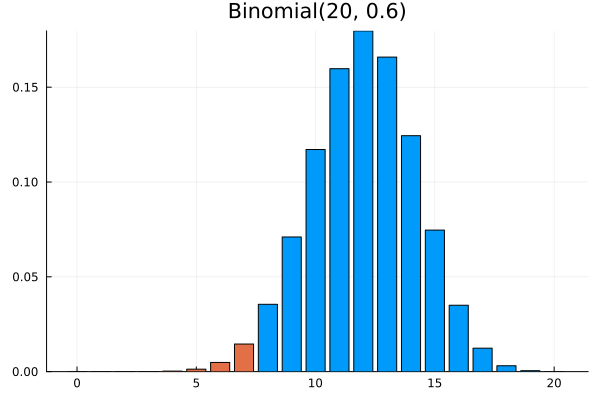

In [2]:
n, p = 20, 0.6
bin = Binomial(n, p)
bar(i -> pdf(bin, i), 8:n; label="")
bar!(i -> pdf(bin, i), 0:7; label="")
title!("Binomial($n, $p)")

In [3]:
2cdf(bin, 7)

0.04205785495554228

In [4]:
2(0.03 + 0.13 + 0.49 + 1.46)/100

0.042199999999999994

In [5]:
sum(pdf(bin, i) for i in 0:n if pdf(bin, i) ⪅ pdf(bin, 7))

0.03699009026777941

In [6]:
normal = Normal(mean(bin), std(bin))
2cdf(normal, 7)

0.022478873366125307

In [7]:
2cdf(normal, 7+0.5)

0.03997960294625698

In [18]:
@show pvalue_central(bin, 7)
@show pvalue_minlike(bin, 7)
@show pvalue_score(bin, 7)
;

pvalue_central(bin, 7) = 0.04205785495554228
pvalue_minlike(bin, 7) = 0.03699009026777941
pvalue_score(bin, 7) = 0.9091514939658668


ほげ[^1]。

[^1] もげ